## Machine Learning and Statistics Assessment 2019

For this project assessment, I shall be exploring the ubiquitous Boston Housing Dataset. This small dataset of 506 cases attributes, was initially published by Harrison, D. and Rubinfeld, D.L. in "Hedonic prices and the demand for clean air', J. Environ. Economics & Management", vol.5, 81-102, 1978 (http://lib.stat.cmu.edu/datasets/boston).

The data was gathered by the US Census Service to gather information about housing in Boston, Massachusetts in 1978.
Before analysing any dataset, it is prudent to give consideration to how societal attitudes of the time, can influence what sort of data is gathered. In this dataset: there's an attribute "B", that refers to the proportion of persons of colour that live in a town. Personally, I would consider such a recorded attribute as racially biased.
But, this attitude was prevalent at the time in the USA. So, I'll be leaving this attribute in the dataset.

#### 1. Descriptive Statistics

In beginning this assessment project, I'll import the required python libraries and the Boston Housing dataset as included within the scikit-learn package.


In [18]:
# import required packages

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd
import seaborn as sns

%matplotlib inline

#import Boston dataset from scikit-learn package
from sklearn.datasets import load_boston

#assign dataset to boston variable
boston = load_boston()

Now that the dataset is loaded, we can look at its description.

In [19]:
#Output Description of dataset from scikit-learn, describes attributes 
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

I'll explore the feature names and create a pandas dataframe from the dataset.

In [20]:
# output the feature names of columns in dataset
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [21]:
#create dataframe with pandas
df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)

#display head of dataset
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


From reading the description of the dataset, and viewing the head() output. I can see that the target variable: 'MEDV' has been ommited. This isn't a problem, as I can add it to our dataset with the code below. This particular variable refers to the median value of homes in $1,000's. 

The 'LSTAT' attribute refers to the percentage of lower status population in the area- we can see already that theres an element of bias by our present standards. I think this is interesting, as it shows that data can also be a snapshot of societal attitudes of it's time.

'NOX' is also a target attribute - refering to the concentration of nitrous oxides in air quality in an area.

What will be most useful is the 'CHAS' attribute. The description tells me that it's a dummy variable that has a value of 1 if a tract of land borders the Charles river and 0 if it doesn't.

In [22]:
#loading missing 'MEDV' variable into sklearn dataset
df_boston['MEDV'] = pd.DataFrame(boston.target)

The value of houses is in $1,000's, so I'll make this clearer in the 'MEDV' column:

In [23]:
# convert value to 1,000's 
df_boston['MEDV'] = (df_boston['MEDV']*1000)

I'll extract some more information about the dataset, and output the pandas dataframe.

In [24]:
#Keys of dataset
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [25]:
#Shape of dataset
print(boston.data.shape)

(506, 13)


In [26]:
#Feature names of dataset
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [27]:
#Display all rows in dataframe
pd.set_option("display.max_rows", 550)

#Output dataframe
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.5380,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24000.0
1,0.02731,0.0,7.07,0.0,0.4690,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21600.0
2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34700.0
3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33400.0
4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36200.0
5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28700.0
6,0.08829,12.5,7.87,0.0,0.5240,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22900.0
7,0.14455,12.5,7.87,0.0,0.5240,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27100.0
8,0.21124,12.5,7.87,0.0,0.5240,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16500.0
9,0.17004,12.5,7.87,0.0,0.5240,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18900.0


Now we have our data, I'll check for any null values.

In [28]:
# Check for NULL values
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No NULL or NaN values found, so we can continue. I'll use Numpy to round off and give us some summary statistics of the dataset.

In [29]:
#Rounding off and summary stats
np.round(df_boston.describe(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22532.81
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9197.10
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5000.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17025.00
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21200.00
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25000.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50000.00


From this table above, It looks like the maximum 'MEDV' value has been capped at $50,000. This may affect the accuracy of my analysis.

I'll take a closer look at the values of the target attribute 'MEDV'.

In [30]:
# values of target attribute of dataset: 'MEDV' in $1,000's
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

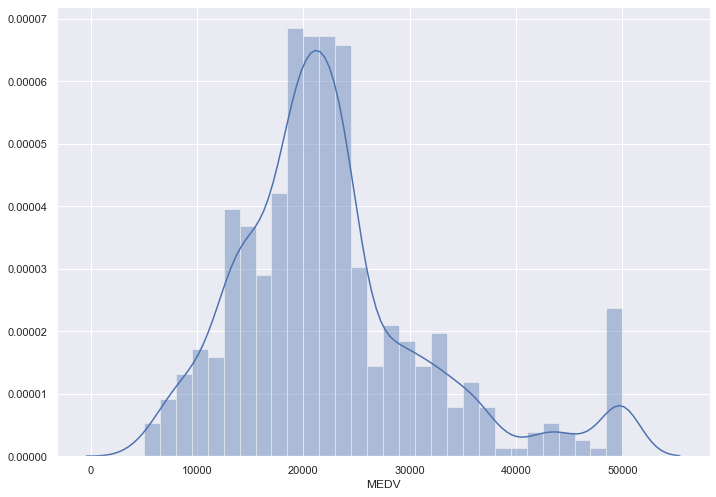

In [31]:
#plot histogram on 'MEDV' (median value) using seaborn adapted from:
#https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_boston['MEDV'], bins=30)
plt.show()

Looking at this plot. I can see that 'MEDV' values are quite evenly distributed, with a few outliers.
I'll explore thelinear relationships between variables with a correlation matrix using the seaborn and pandas libraries.

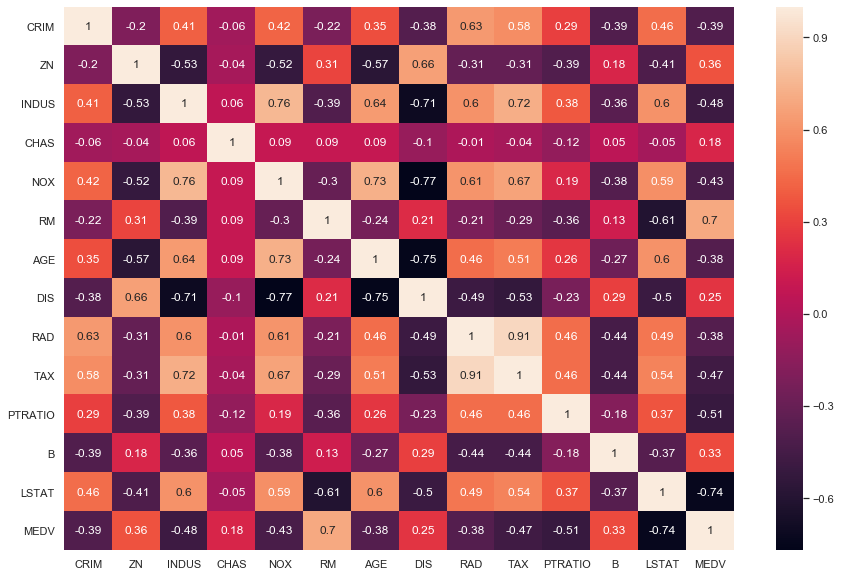

In [32]:
#Code adapted from https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
correlation_matrix = df_boston.corr().round(2)
plt.figure(figsize=(15, 10))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

##### The correlation matrix give us a visual representation of the correlation values between attributes. The closer to a positive value of 1, the higher the correlation between 2 attributes.

* The positive value on the matrix is 0.7 between RM(average number of rooms per home) and the target variable MEDV(median value of homes).


* In contrast, the positive correlation between CHAS(bordering the Charles river) and MEDV is 0.18. Positive but not decisive in affecting house values.


* The highest value is 0.91 between TAX(full-value property-tax rate per $10,000) and RAD(index of accessibility to radial highways).

#### 2. Inferential Statistics

In this section, I'll analyse the data to see if theres a significant difference in MEDV between houses bordering the Charles river and those that aren't. 
Looking over the dataframe, I don't see too many values of 1 for the CHAS attribute(houses bordering the river).
I'll use the researchpy package to explore this.

In [45]:
# import researchpy
import researchpy as rp
# summary of stats for MEDV target variable
rp.summary_cont(df_boston['MEDV'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,MEDV,506.0,22532.806324,9197.104087,408.861147,21729.528015,23336.084634


In [46]:
# count and percentage of CHAS values
rp.summary_cat(df_boston['CHAS'])

,Variable,Outcome,Count,Percent
0,CHAS,0.0,471,93.08
1,,1.0,35,6.92


Now I'll use a groupby function to get stats on houses that bound the river (1.0) and don't (0.0).

In [41]:
# summary stats of MEDV and CHAS
rp.summary_cont(df_boston['MEDV'].groupby(df_boston['CHAS']))

,N,Mean,SD,SE,95% Conf.,Interval
CHAS,,,,,,
0.0,471,22093.842887,8831.362410,406.927700,21295.416559,22892.269216
1.0,35,28440.000000,11816.643298,1997.377272,24467.986291,32412.013709


In [ ]:
From the returned DataFrame, we can see that the houses bound the river (CHAS 1.0) have a higher mean MEDV.

#### 3. Predictive Statistics with Keras

### References

1. https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

2. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

3. https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset

4. https://www.ritchieng.com/machine-learning-project-boston-home-prices/

5. https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

6. http://www.neural.cz/dataset-exploration-boston-house-pricing.html #Old article

7. https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook #Markdown tutorial

8. https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

9. https://enterprise-docs.anaconda.com/en/latest/data-science-workflows/data/stats.html

10. https://towardsdatascience.com/5-minute-guide-to-plotting-with-pandas-e8c0f40a1df4

11. https://pypi.org/project/researchpy/